# Install Requiremnets

In [1]:
pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 40.0 MB/s eta 0:00:00


In [2]:
pip install jax

In [3]:
import pennylane as qml
from pennylane import numpy as np

# Deutchs Algorithm

In [24]:
dev = qml.device("default.qubit", wires=2,shots=100)

In [25]:

def oracle1():
    qml.CNOT(wires=[1,0])

In [26]:
@qml.qnode(dev)
def QA(oracle):
    qml.PauliX(wires=1)
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    oracle()
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)



In [27]:
res=QA(oracle1)
print(res)

[1. 0.]


(<Figure size 700x300 with 1 Axes>, <Axes: >)


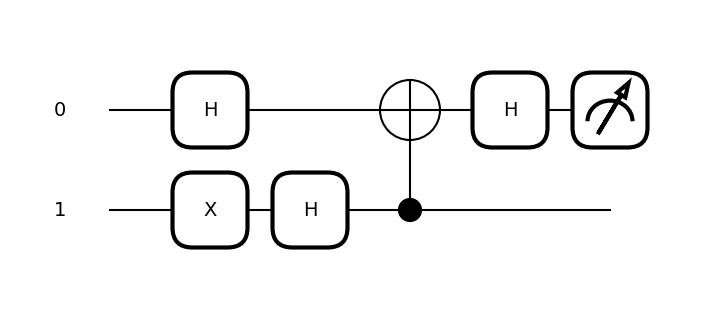

In [28]:
cd=qml.draw_mpl(QA)(oracle=oracle1)
print(cd)

# Deutchs - Jozsa

In [8]:
dev1=qml.device("default.qubit",wires=3,shots=1)

In [9]:
@qml.qnode(dev1)
def QAj(oracle):
  qml.Hadamard(wires=0)
  qml.Hadamard(wires=1)
  qml.Hadamard(wires=2)
  oracle()
  qml.Hadamard(wires=0)
  qml.Hadamard(wires=1)
  return qml.probs(wires=[0,1])
def oracle2():
    qml.CNOT(wires=[0,1])
    # qml.CNOT(wires=[2,1])
res1=QAj(oracle2)


In [10]:
print(res1)

[1. 0. 0. 0.]


(<Figure size 600x400 with 1 Axes>, <Axes: >)


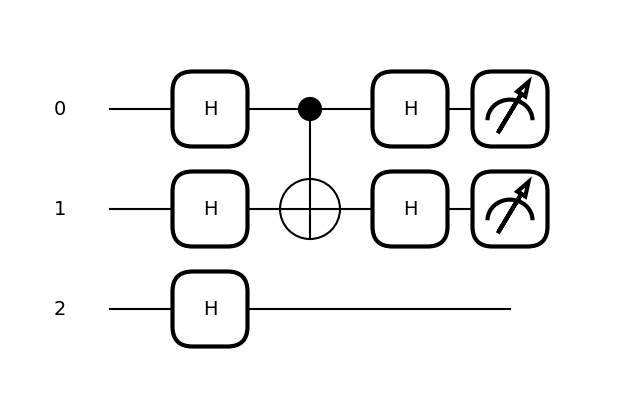

In [11]:
cd1=qml.draw_mpl(QAj)(oracle=oracle2)
print(cd1)

# Bernstein-Vazirani Algorithm

In [12]:
n=3
x=np.array([1,0,0])

In [13]:
dev=qml.device("default.qubit",wires=n+1,shots=4)

In [14]:
def oracle3():
  for i in range(n):
        if x[i] == 1:
            qml.CNOT(wires=[i, n])

In [15]:
@qml.qnode(dev)
def BVA(x):
  for i in range(n):
      qml.Hadamard(wires=i)
  qml.Hadamard(wires=n)
  oracle3()
  for i in range(n):
        qml.Hadamard(wires=i)
  return qml.probs(wires=range(n))

In [16]:
res3=BVA(x)
print(res3)

[1. 0. 0. 0. 0. 0. 0. 0.]


(<Figure size 600x500 with 1 Axes>, <Axes: >)


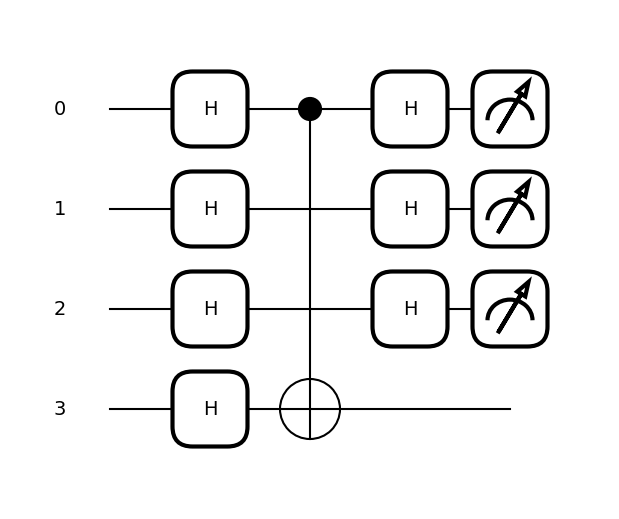

In [17]:
cd3=qml.draw_mpl(BVA)(oracle3)
print(cd3)

# Berstein Algorithm EX-2

In [18]:
n=3
x=np.array([0,1,0])

In [19]:
dev=qml.device("default.qubit",wires=n,shots=4)

In [20]:
 def oracle4(wires):
      for i in range(n):
        if x[i] == 1:
            qml.CNOT(wires=[i, n])


In [21]:
def SA(x):
  for i in range(n):
    qml.Hadamard(wires=i)
  oracle4(wires=range(n+1))

  for i in range(n):
       qml.Hadamard(wires=i)

  return qml.probs(wires=range(n))


In [22]:
res4=SA(x)
print(res4)

probs(wires=[0, 1, 2])


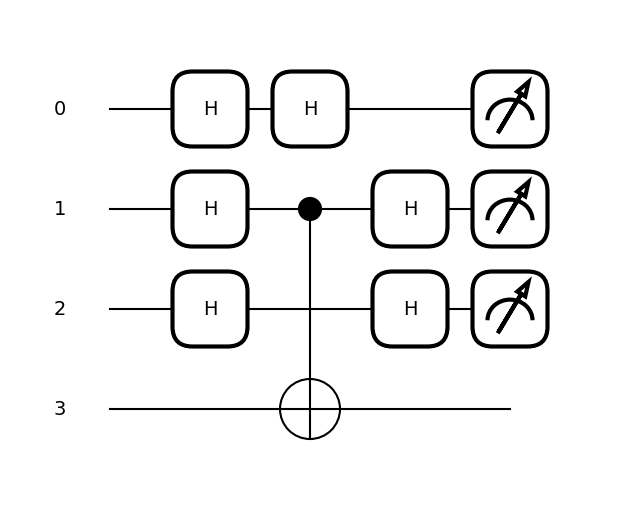

In [23]:
cd4=qml.draw_mpl(SA)(oracle4)